In [1]:
import pandas as pd
import pandas_ta as ta
import mplfinance as mpf
import numpy as np
import mplfinance as mpf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


# read_data

In [82]:
df = pd.read_csv('../clean_data/clean_google.csv')
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)
df['Close+1'] = df['Close'].shift(-1)
df[['Close', 'Close+1']].tail(2)
df = df.drop(columns=[ 'tema_2', 'tema_8','tema_100'])
df.dropna()

,Open,High,Low,Close,Volume,NATR_3,RSI_3,ADX_3,CCI_3_0.015,ROC_3,...,MACD_12_26_9,BBL_3_2.0,BBM_3_2.0,BBU_3_2.0,BBB_3_2.0,BBP_3_2.0,min_price_3,max_price_3,mid_price,Close+1
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-10 00:00:00-05:00,4.867367,4.957457,4.800551,4.881381,301282416,3.297238,58.767641,42.870467,100.000000,0.800973,...,0.125710,4.675485,4.816983,4.958482,5.874972,0.727556,4.697698,4.957457,4.879004,4.843343
2005-01-11 00:00:00-05:00,4.895395,4.947698,4.834334,4.843343,278069652,2.831877,48.714336,37.850269,44.635922,2.646507,...,0.119457,4.825786,4.858608,4.891431,1.351113,0.267455,4.724224,4.957457,4.891016,4.889389
2005-01-12 00:00:00-05:00,4.863113,4.903153,4.767267,4.889389,326784888,2.792202,60.869291,34.702612,-100.000000,0.789267,...,0.116870,4.831197,4.871371,4.911544,1.649371,0.724253,4.767267,4.957457,4.835210,4.888138
2005-01-13 00:00:00-05:00,4.889389,4.939690,4.856106,4.888138,273702024,2.251429,60.286905,24.983021,96.306268,0.138419,...,0.113411,4.830788,4.873623,4.916458,1.757837,0.669424,4.767267,4.947698,4.897898,5.004254
2005-01-14 00:00:00-05:00,4.904905,5.005255,4.858108,5.004254,385226388,2.569815,82.969438,31.594403,100.000000,3.322315,...,0.118672,4.818370,4.927260,5.036150,4.419909,0.853538,4.767267,5.005255,4.931682,5.102603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-29 00:00:00-04:00,119.239998,120.059998,118.300003,119.099998,24090900,2.208150,37.185949,55.252253,50.763377,0.642219,...,0.337041,117.685763,119.203334,120.720904,2.546187,0.465954,116.099998,120.389999,119.180000,119.699997
2023-06-30 00:00:00-04:00,120.169998,121.080002,119.690002,119.699997,29519700,1.925610,47.880285,38.544280,100.000000,1.157775,...,0.204830,118.776368,119.659999,120.543629,1.476902,0.522633,116.849998,121.080002,120.385002,119.900002
2023-07-03 00:00:00-04:00,119.239998,120.190002,118.820000,119.900002,14467900,1.532510,51.969111,34.240526,-2.406849,-0.232983,...,0.114865,118.886795,119.566666,120.246537,1.137225,0.745146,118.300003,121.080002,119.505001,121.750000


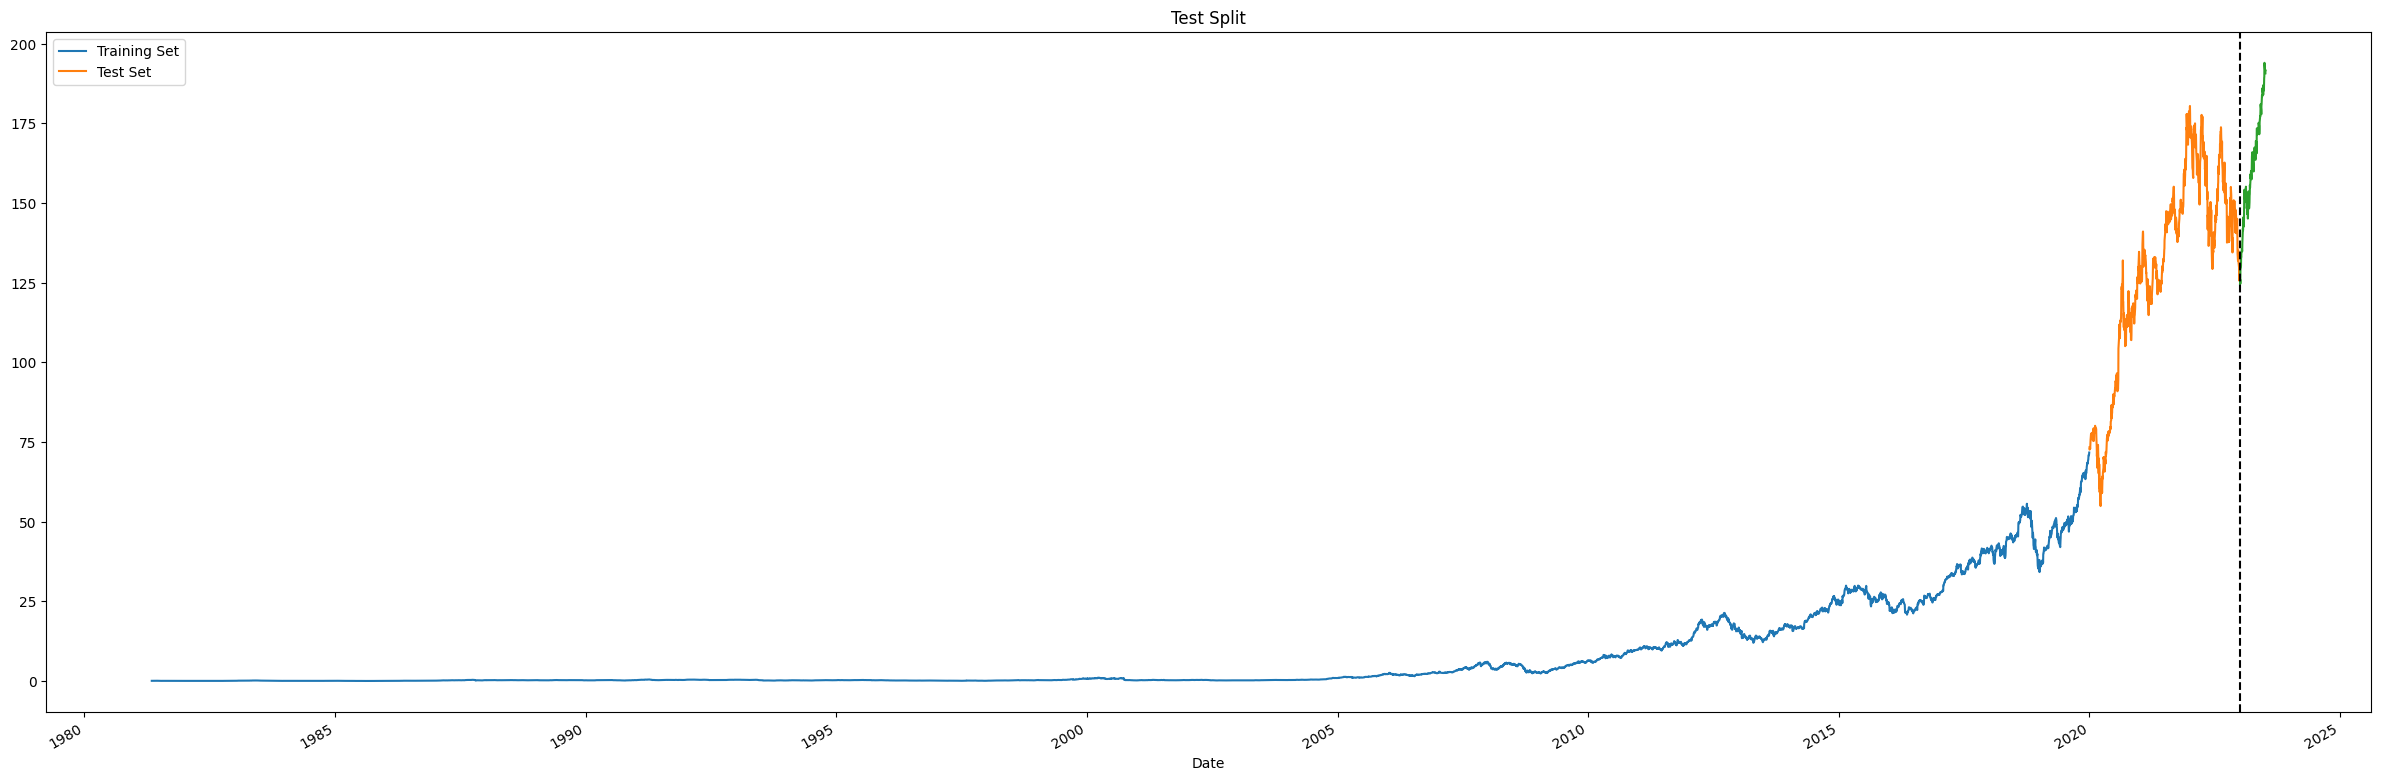

In [3]:
train = df.loc[(df.index < pd.to_datetime('2020-01-01 00:00:00-04:00'))]
test = df.loc[(df.index >= pd.to_datetime('2020-01-01 00:00:00-04:00')) & (df.index < pd.to_datetime('2023-01-01 00:00:00-04:00'))]
test_last = df.loc[df.index >=  pd.to_datetime('2023-01-01 00:00:00-04:00')]

fig, ax = plt.subplots(figsize=(30, 10))
train['Close'].plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test['Close'].plot(ax=ax, label='test Set', title='Test Split')

test_last['Close'].plot(ax=ax, label='val Set')
ax.axvline('01-01-2023', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
# plt.show()

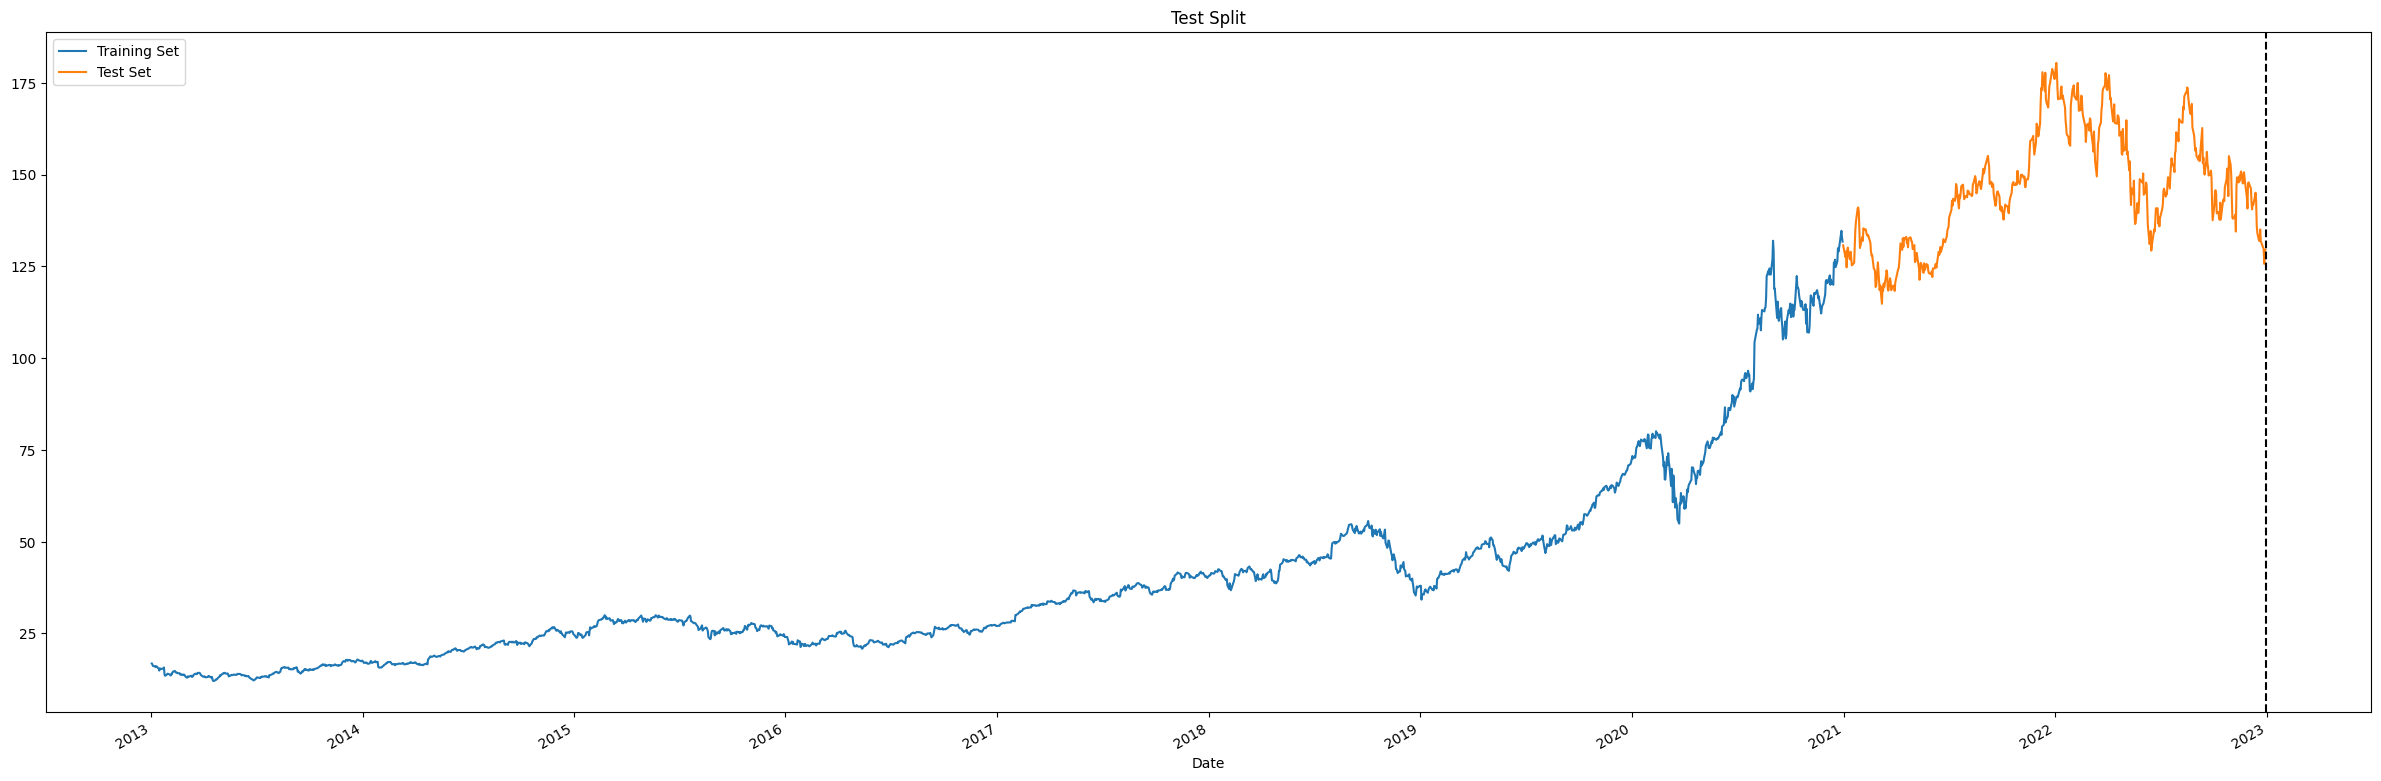

In [4]:
temp_df = df.loc[ pd.to_datetime('2013-01-01 00:00:00-04:00'): pd.to_datetime('2022-12-31 00:00:00-04:00')]
# pd.to_datetime('2023-01-01 00:00:00-04:00')
train_size = int(len(temp_df) * 0.80)
test_size = int(len(temp_df) - train_size)

train = temp_df[:train_size]
test= temp_df[train_size:]

fig, ax = plt.subplots(figsize=(30, 10))

train['Close'].plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test['Close'].plot(ax=ax, label='test Set', title='Test Split')

ax.axvline('01-01-2023', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [9]:
import warnings
from sklearn.exceptions import ConvergenceWarning,DataConversionWarning
from sklearn.model_selection import TimeSeriesSplit

# Filter out DataConversionWarning
warnings.filterwarnings("ignore", category=DataConversionWarning)

# Filter out ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)



In [19]:
def create_tema(
        stock: pd.DataFrame, 
        MA_period:int 
        ):

    ema1 = ta.ema(stock['Close'], length=MA_period)

    # Calculate the second EMA
    ema2 = ta.ema(ema1, length=MA_period)

    # Calculate the third EMA
    ema3 = ta.ema(ema2, length=MA_period)

    # Calculate TEMA
    tema = 3 * (ema1 - ema2) + ema3
    #stock[f'tema_{MA_period}'] = tema
    return tema

In [12]:
temp_df = temp_df.drop(columns=['tema_100'])
temp_df

,Open,High,Low,Close,Volume,NATR_3,RSI_3,ADX_3,CCI_3_0.015,ROC_3,...,MACD_12_26_9,BBL_3_2.0,BBM_3_2.0,BBU_3_2.0,BBB_3_2.0,BBP_3_2.0,min_price_3,max_price_3,mid_price,Close+1
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02 00:00:00-05:00,16.960549,16.996686,16.587235,16.813856,560518000,3.672098,86.930087,59.998010,100.000000,6.595327,...,-0.325199,15.249494,16.239136,17.228779,12.188362,0.790367,15.561006,16.996686,16.791960,16.601631
2013-01-03 00:00:00-05:00,16.778642,16.833460,16.567944,16.601631,352965200,2.659188,68.346624,63.518323,34.568121,6.379635,...,-0.267277,16.147207,16.571006,16.994804,5.114935,0.536132,15.587956,16.996686,16.700702,16.139193
2013-01-04 00:00:00-05:00,16.444520,16.495358,16.103361,16.139193,594333600,2.911355,40.234107,44.809364,-100.000000,-0.971538,...,-0.255741,15.954880,16.518227,17.081574,6.820914,0.163587,16.103361,16.996686,16.299360,16.044268
2013-01-07 00:00:00-05:00,15.986080,16.209640,15.777833,16.044268,484156400,2.809964,35.711320,42.353447,-82.729306,-4.577109,...,-0.251360,15.774750,16.261697,16.748644,5.988884,0.276742,15.777833,16.833460,15.993736,16.087448
2013-01-08 00:00:00-05:00,16.206885,16.288959,15.963113,16.087448,458707200,2.413944,40.291144,35.858819,-8.203337,-3.097184,...,-0.241619,16.012692,16.090303,16.167914,0.964692,0.481609,15.777833,16.495358,16.126036,15.836010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,130.539854,132.035499,129.263572,131.477127,63814900,2.828597,27.641183,37.308285,-75.012995,-0.332576,...,-3.644183,129.578209,132.793284,136.008360,4.842226,0.295315,129.263572,136.412738,130.649535,129.652435
2022-12-27 00:00:00-05:00,130.998521,131.028433,128.346242,129.652435,69007800,2.641618,18.464509,41.547614,-100.000000,-4.001469,...,-3.910066,129.073825,130.991867,132.909909,2.928490,0.150834,128.346242,134.169275,129.687337,125.674026
2022-12-28 00:00:00-05:00,129.293484,130.649535,125.504522,125.674026,85438400,3.409589,8.852589,52.109435,-100.000000,-4.681227,...,-4.391187,124.088766,128.934530,133.780294,7.516627,0.163572,125.504522,132.035499,128.077029,129.233658


In [54]:
rmse = []
period = []

df = pd.read_csv('../clean_data/clean_apple.csv')
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)
df['Close+1'] = df['Close'].shift(-1)
df = df.drop(columns=[ 'tema_2', 'tema_8','tema_100'])
df.dropna()



for i in range(2,201):
    test_df =df.copy()
    test_df[f'tema_{i}'] = create_tema(test_df,i)
    test_df = test_df.dropna()
    #print(test_df)
    train = test_df.loc[(test_df.index < pd.to_datetime('2020-01-01 00:00:00-04:00'))]
    test = test_df.loc[(test_df.index >= pd.to_datetime('2020-01-01 00:00:00-04:00')) & (test_df.index < pd.to_datetime('2023-01-01 00:00:00-04:00'))]


    
    mean_val = 0

    #@svr =SVR(C=1, degree= 1, kernel='linear', max_iter= 1000)
    svr =SVR( max_iter= 1000)

    
    X_train = train.copy().drop(columns=['Close+1'])

    scaler = StandardScaler()
    scaler.fit(X_train)
    x_train_scaled = scaler.transform(X_train)
    y_train = train[['Close+1']]
    X_test = test.copy().drop(columns=['Close+1'])
    X_test_scaled = scaler.transform(X_test)

    y_test = test[['Close+1']]
    
    svr.fit(x_train_scaled, y_train)

    y_pred = svr.predict(X_test_scaled)

    result = test.copy()
    result['pred'] = y_pred
        
        
    mean_val+= mean_squared_error(y_pred, y_test)
        
    rmse.append(mean_val)
    period.append(i)
    #print(test_df.columns)

KeyboardInterrupt: 

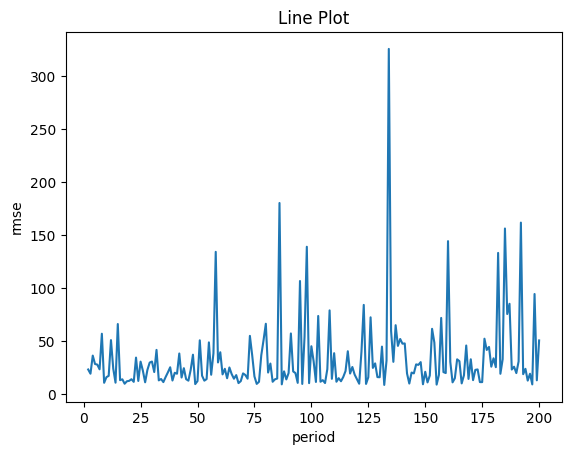

In [ ]:


# Plot the line
plt.plot(period, rmse)

# Add labels and title
plt.xlabel('period')
plt.ylabel('rmse')
plt.title('Line Plot')

# Display the plot
plt.show()

In [85]:
rmse = []
period = []

#df = df.drop(columns=['tema_100'])


for i in range(2,30):

    test_df =df.copy()
    
    test_df[f'tema_{i}'] = create_tema(test_df,i)
    test_df = test_df.dropna()



    test_size_ratio = 0.1  # Tỷ lệ phần trăm dùng cho tập kiểm tra
    test_size = int(test_df.shape[0] * test_size_ratio)


    tscv = TimeSeriesSplit(n_splits=5, test_size=test_size, gap=0)

    fold = 0
    #print(test_df)

    mean_val = 0
    for train_idx, val_idx in tscv.split(test_df.copy()):

        svr =SVR(C=1, degree= 1, kernel='linear', max_iter= 1000)
        #'C': 0.1, 'degree': 1, 'gamma': 10, 'kernel': 'poly', 'max_iter': 1000

        train = test_df.iloc[train_idx]
        test= test_df.iloc[val_idx]
        X_train = train.copy().drop(columns=['Close+1'])

        scaler = StandardScaler()
        scaler.fit(X_train)
        x_train_scaled = scaler.transform(X_train)
        y_train = train[['Close+1']]
        X_test = test.copy().drop(columns=['Close+1'])
        X_test_scaled = scaler.transform(X_test)

        y_test = test[['Close+1']]
        
        svr.fit(x_train_scaled, y_train)

        y_pred = svr.predict(X_test_scaled)

        result = test.copy()
        result['pred'] = y_pred
        
        
        # print(mean_squared_error(y_pred, y_test))
        mean_val+= mean_squared_error(y_pred, y_test)
        
    rmse.append(mean_val)
    period.append(i)
    
    print(test_df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'NATR_3', 'RSI_3', 'ADX_3',
       'CCI_3_0.015', 'ROC_3', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'WILLR_3',
       'OBV', 'MACD_12_26_9', 'BBL_3_2.0', 'BBM_3_2.0', 'BBU_3_2.0',
       'BBB_3_2.0', 'BBP_3_2.0', 'min_price_3', 'max_price_3', 'mid_price',
       'Close+1', 'tema_2'],
      dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'NATR_3', 'RSI_3', 'ADX_3',
       'CCI_3_0.015', 'ROC_3', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'WILLR_3',
       'OBV', 'MACD_12_26_9', 'BBL_3_2.0', 'BBM_3_2.0', 'BBU_3_2.0',
       'BBB_3_2.0', 'BBP_3_2.0', 'min_price_3', 'max_price_3', 'mid_price',
       'Close+1', 'tema_3'],
      dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'NATR_3', 'RSI_3', 'ADX_3',
       'CCI_3_0.015', 'ROC_3', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'WILLR_3',
       'OBV', 'MACD_12_26_9', 'BBL_3_2.0', 'BBM_3_2.0', 'BBU_3_2.0',
       'BBB_3_2.0', 'BBP_3_2.0', 'min_price_3', 'max_price_3', 'mid_price',
    

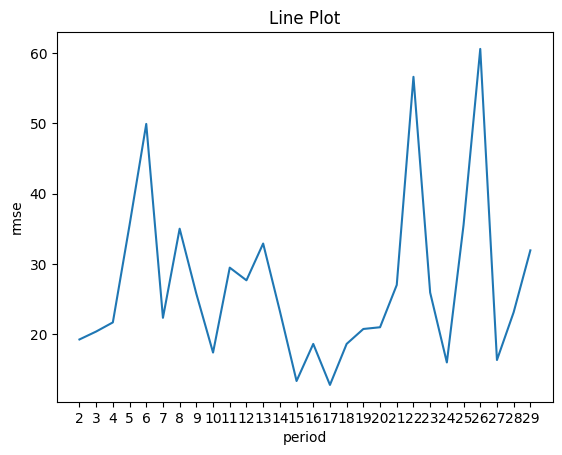

In [84]:


# Plot the line
plt.plot(period, rmse)
plt.xticks(period)

# Add labels and title
plt.xlabel('period')
plt.ylabel('rmse')
plt.title('Line Plot')

# Display the plot
plt.show()